In [16]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import requests
from statsmodels.tsa.stattools import adfuller

In [141]:
def get_data_from_api_query():
    lst = [
        '5f718b613291c7.03696209',]
        # '5f718c439c7a78.65267835',]
        
    l1 = []
    toDate = datetime(2023, 11, 18, 23, 59, 59)

    for sensor in lst:
        url = "https://multipoint.myxenius.com/Sensor_newHelper/getDataApi"

        params = {
            'sql': "select raw_data, sensor_id from dlms_load_profile where sensor_id='{}' and read_time<='{}' order by read_time".format(
                sensor, toDate),
            'type': 'query'
        }
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        l1.append(data['resource'])

    columns = ['sensor', 'Clock', 'R_Voltage', 'Y_Voltage', 'B_Voltage', 'R_Current', 'Y_Current',
            'B_Current', 'A', 'BlockEnergy-WhExp', 'B', 'C', 'D', 'BlockEnergy-VAhExp',
            'Kwh', 'BlockEnergy-VArhQ1', 'BlockEnergy-VArhQ4', 'BlockEnergy-VAhImp']

    datalist = [(entry['sensor_id'], entry['raw_data']) for i in range(len(l1)) for entry in l1[i]]

    df = pd.DataFrame([row[0].split(',') + row[1].split(',') for row in datalist], columns=columns)

    df = df.drop([
        'BlockEnergy-WhExp', 'A', 'B', 'C', 'D', 'BlockEnergy-VAhExp', 'BlockEnergy-VAhExp', 'BlockEnergy-VArhQ1',
        'BlockEnergy-VArhQ4', 'BlockEnergy-VAhImp'], axis=1)
    pd.set_option('display.max_columns', None)

    df['Clock'] = pd.to_datetime(df['Clock'])
    df['Kwh'] = df['Kwh'].astype(float)
    df['R_Voltage'] = df['R_Voltage'].astype(float)
    df['Y_Voltage'] = df['Y_Voltage'].astype(float)
    df['B_Voltage'] = df['B_Voltage'].astype(float)
    df['R_Current'] = df['R_Current'].astype(float)
    df['Y_Current'] = df['Y_Current'].astype(float)
    df['B_Current'] = df['B_Current'].astype(float)
    # print(df.tail())
    return df


In [17]:

def data_from_weather_api():
    ''' temperature_humidity_rain'''
    try:
        l1=[]
        value=[]
        url = "https://archive-api.open-meteo.com/v1/archive?latitude=28.58&longitude=77.33&start_date=2022-11-18&end_date=2023-11-18&hourly=temperature_2m,relative_humidity_2m,rain&timezone=auto"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        l1.append(data)
        
        data1=l1[0]
        z=data1['hourly']
        
        for i in range(len(z['time'])):
            value.append({
                        "time":z['time'][i],
                        "temp":z['temperature_2m'][i],
                        "humidity":z['relative_humidity_2m'][i],
                        "rain":z['rain'][i],
                        })
        df=pd.DataFrame(value)
        df['time']=pd.to_datetime(df['time']) 
        df.set_index("time",inplace=True, drop=True)
        return df
    
    except Exception as e:
        print(e) 

In [19]:
df=data_from_weather_api()
df

,temp,humidity,rain
time,,,
2022-11-18 00:00:00,14.8,74,0.0
2022-11-18 01:00:00,14.5,75,0.0
2022-11-18 02:00:00,14.1,76,0.0
2022-11-18 03:00:00,13.6,77,0.0
2022-11-18 04:00:00,13.0,78,0.0
...,...,...,...
2023-11-18 19:00:00,22.8,55,0.0
2023-11-18 20:00:00,22.3,57,0.0
2023-11-18 21:00:00,18.4,72,0.0


In [20]:
df=data_from_weather_api()
df

,temp,humidity,rain
time,,,
2022-11-18 00:00:00,14.8,74,0.0
2022-11-18 01:00:00,14.5,75,0.0
2022-11-18 02:00:00,14.1,76,0.0
2022-11-18 03:00:00,13.6,77,0.0
2022-11-18 04:00:00,13.0,78,0.0
...,...,...,...
2023-11-18 19:00:00,22.8,55,0.0
2023-11-18 20:00:00,22.3,57,0.0
2023-11-18 21:00:00,18.4,72,0.0


In [21]:
def data_from_weather_api():
    ''' temperature_humidity_rain'''
    try:
        l1=[]
        value=[]
        url = "https://archive-api.open-meteo.com/v1/archive?latitude=28.58&longitude=77.33&start_date=2022-11-18&end_date=2023-11-18&hourly=temperature_2m,relative_humidity_2m,rain&timezone=auto"
        # url = "https://archive-api.open-meteo.com/v1/archive?latitude=28.58&longitude=77.33&start_date=2022-11-18&end_date=2022-11-18&hourly=temperature_2m,relative_humidity_2m,rain&timezone=auto"
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        l1.append(data)
        
        data1=l1[0]
        z=data1['hourly']
        
        for i in range(len(z['time'])):
            value.append({
                        "time":z['time'][i],
                        "temp":z['temperature_2m'][i],
                        "humidity":z['relative_humidity_2m'][i],
                        "rain":z['rain'][i],
                        })
        df=pd.DataFrame(value)
        df['time']=pd.to_datetime(df['time']) 
        df.set_index("time",inplace=True, drop=True)
        return df
    
    except Exception as e:
        print(e) 

In [22]:
df=data_from_weather_api()

In [120]:
x=data_from_weather_api() 
y=x[0]
z=y['hourly']

len(z['time'])
z.keys()


dict_keys(['time', 'temperature_2m', 'relative_humidity_2m', 'rain'])

In [50]:
z['time'][1]
len(z['time'])

8784

In [121]:
value=[]
for i in range(len(z['time'])):
    value.append({
                "time":z['time'][i],
                "temp":z['temperature_2m'][i],
                "humidity":z['relative_humidity_2m'][i],
                "rain":z['rain'][i],
                })

In [89]:
df1=pd.DataFrame(value)
df1['time']=pd.to_datetime(df1['time'])
df1.set_index("time",inplace=True, drop=True)


In [91]:
df1

,temp,humidity,rain
time,,,
2022-11-18 00:00:00,14.8,74,0.0
2022-11-18 01:00:00,14.5,75,0.0
2022-11-18 02:00:00,14.1,76,0.0
2022-11-18 03:00:00,13.6,77,0.0
2022-11-18 04:00:00,13.0,78,0.0
...,...,...,...
2023-11-18 19:00:00,22.8,55,0.0
2023-11-18 20:00:00,22.3,57,0.0
2023-11-18 21:00:00,18.4,72,0.0


<Axes: xlabel='time'>

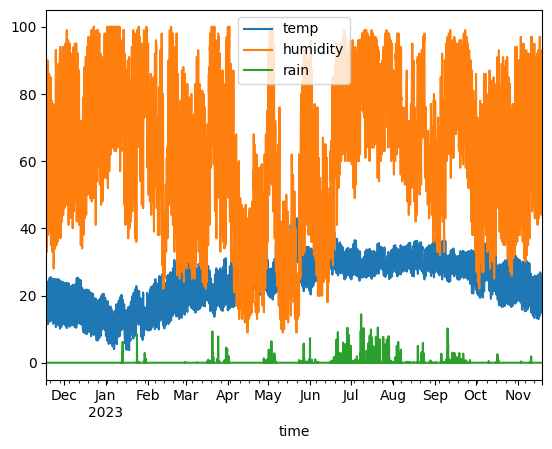

In [53]:
df1.plot()

In [142]:
df=get_data_from_api_query()
df.set_index('Clock',inplace=True, drop=True)
dfresample=df[['Kwh']].resample(rule="1H").sum()

In [143]:
dfresample.head()

,Kwh
Clock,
2022-11-18 00:00:00,8800.0
2022-11-18 01:00:00,16800.0
2022-11-18 02:00:00,16300.0
2022-11-18 03:00:00,16200.0
2022-11-18 04:00:00,16200.0


In [149]:
df=data_from_weather_api()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2022-11-18 00:00:00 to 2023-11-18 23:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   temp      8784 non-null   float64
 1   humidity  8784 non-null   int64  
 2   rain      8784 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 274.5 KB


In [146]:
dfresample = pd.merge(dfresample, df, left_index=True, right_index=True, how='left')
dfresample

,Kwh,temp,humidity,rain
Clock,,,,
2022-11-18 00:00:00,8800.0,14.8,74,0.0
2022-11-18 01:00:00,16800.0,14.5,75,0.0
2022-11-18 02:00:00,16300.0,14.1,76,0.0
2022-11-18 03:00:00,16200.0,13.6,77,0.0
2022-11-18 04:00:00,16200.0,13.0,78,0.0
...,...,...,...,...
2023-11-18 19:00:00,25100.0,22.8,55,0.0
2023-11-18 20:00:00,25200.0,22.3,57,0.0
2023-11-18 21:00:00,25600.0,18.4,72,0.0


In [147]:
dfresample.isna().sum()

Kwh         0
temp        0
humidity    0
rain        0
dtype: int64

In [135]:
dfresample[['temp'],]  = df['temp']#,'humidity',"rain"]

In [136]:
dfresample

,Kwh,humidity,rain,temp
Clock,,,,
2022-11-18 00:00:00,NaN,NaN,NaN,14.8
2022-11-18 01:00:00,NaN,NaN,NaN,14.5
2022-11-18 02:00:00,NaN,NaN,NaN,14.1
2022-11-18 03:00:00,NaN,NaN,NaN,13.6
2022-11-18 04:00:00,NaN,NaN,NaN,13.0
...,...,...,...,...
2023-11-18 19:00:00,NaN,NaN,NaN,22.8
2023-11-18 20:00:00,NaN,NaN,NaN,22.3
2023-11-18 21:00:00,NaN,NaN,NaN,18.4


In [101]:
df1

,temp,humidity,rain,Kwh
time,,,,
2022-11-18 00:00:00,14.8,74,0.0,8.8
2022-11-18 01:00:00,14.5,75,0.0,16.8
2022-11-18 02:00:00,14.1,76,0.0,16.3
2022-11-18 03:00:00,13.6,77,0.0,16.2
2022-11-18 04:00:00,13.0,78,0.0,16.2
...,...,...,...,...
2023-11-18 19:00:00,22.8,55,0.0,25.1
2023-11-18 20:00:00,22.3,57,0.0,25.2
2023-11-18 21:00:00,18.4,72,0.0,25.6


In [103]:
dfresample

,Kwh
Clock,
2022-11-18 00:00:00,8800.0
2022-11-18 01:00:00,16800.0
2022-11-18 02:00:00,16300.0
2022-11-18 03:00:00,16200.0
2022-11-18 04:00:00,16200.0
...,...
2023-11-18 19:00:00,25100.0
2023-11-18 20:00:00,25200.0
2023-11-18 21:00:00,25600.0


In [104]:
df1['Kwh']=dfresample['Kwh']

In [107]:
df1.isna().sum()

temp        0
humidity    0
rain        0
Kwh         0
dtype: int64

In [108]:
df1

,temp,humidity,rain,Kwh
time,,,,
2022-11-18 00:00:00,14.8,74,0.0,8800.0
2022-11-18 01:00:00,14.5,75,0.0,16800.0
2022-11-18 02:00:00,14.1,76,0.0,16300.0
2022-11-18 03:00:00,13.6,77,0.0,16200.0
2022-11-18 04:00:00,13.0,78,0.0,16200.0
...,...,...,...,...
2023-11-18 19:00:00,22.8,55,0.0,25100.0
2023-11-18 20:00:00,22.3,57,0.0,25200.0
2023-11-18 21:00:00,18.4,72,0.0,25600.0


In [79]:
df3=pd.merge(df1,dfresample,how='inner')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [72]:
df3

,temp,humidity,rain,Kwh
2022-11-18 00:00:00,14.8,74.0,0.0,NaN
2022-11-18 01:00:00,14.5,75.0,0.0,NaN
2022-11-18 02:00:00,14.1,76.0,0.0,NaN
2022-11-18 03:00:00,13.6,77.0,0.0,NaN
2022-11-18 04:00:00,13.0,78.0,0.0,NaN
...,...,...,...,...
2023-11-18 19:00:00,NaN,NaN,NaN,25.1
2023-11-18 20:00:00,NaN,NaN,NaN,25.2
2023-11-18 21:00:00,NaN,NaN,NaN,25.6
2023-11-18 22:00:00,NaN,NaN,NaN,23.4


In [81]:
import pandas as pd

# Create two sample DataFrames
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                    'value': [1, 2, 3, 4]})

df2 = pd.DataFrame({'key': ['g'],
                    'value': [5]})

# Perform an inner join based on the 'key' column
result_inner = pd.merge(df1, df2, how='inner')
print("Inner Join Result:")
print(result_inner)

# Perform a left join based on the 'key' column
result_left = pd.merge(df1, df2, how='left')
print("\nLeft Join Result:")
print(result_left)

# Perform a right join based on the 'key' column
result_right = pd.merge(df1, df2, how='right')
print("\nRight Join Result:")
print(result_right)

# Perform an outer join based on the 'key' column
result_outer = pd.merge(df1, df2, how='outer')
print("\nOuter Join Result:")
print(result_outer)


Inner Join Result:
Empty DataFrame
Columns: [key, value]
Index: []

Left Join Result:
  key  value
0   A      1
1   B      2
2   C      3
3   D      4

Right Join Result:
  key  value
0   g      5

Outer Join Result:
  key  value
0   A      1
1   B      2
2   C      3
3   D      4
4   g      5


,key,value
0,B,5
1,D,6
2,E,7
3,F,8


In [13]:
df.head(2)

,sensor,Clock,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,Kwh
0,5f718b613291c7.03696209,2022-11-18 00:30:00,6579.0,6616.0,6631.0,3.18,3.34,4.88,8800.0
1,5f718b613291c7.03696209,2022-11-18 01:00:00,6595.0,6632.0,6647.0,3.25,3.34,4.86,8600.0


In [ ]:
df['Kwh'] = df['Kwh'] / 1000
# Label Encoding for 'sensor'

df1['label_sensor'] = self.le.fit_transform(df1['sensor'])

sensor_ids = df1['sensor'].unique()
print(sensor_ids)
dframe = df1.groupby('label_sensor')

# Create a dictionary to map encoded values to original sensor IDs
self.sensorDecode(sensor_ids)

# for sensor_id in sensor_ids:
#     sensor_df = df1[df1['sensor'] == sensor_id]
for labeled_id, data in dframe:
    sensor_df = data
    filtered_df = sensor_df[((sensor_df['R_Voltage'] == 0) | (sensor_df['Y_Voltage'] == 0) | (sensor_df['B_Voltage'] == 0)) & (
                (sensor_df['R_Current'] == 0) | (
                sensor_df['Y_Current'] == 0) | (sensor_df['B_Current'] == 0))]
    filtered_df['Kwh'] = 0

    sensor_df.loc[sensor_df.index.isin(filtered_df.index), :] = filtered_df

    '''Data Conversion'''
    sensor_df['Clock'] = pd.to_datetime(sensor_df['Clock'])
    sensor_df.set_index(['Clock'], inplace=True, drop=True)
    sensor_df = sensor_df[sensor_df.index >= '2022-11-18 00:00:00']
    sensor_id = sensor_df['sensor'].unique()
    # sensor_df['Kwh'].plot(figsize=(10, 5), color=color_pal[4], ms=1, lw=1,
    #                                title='Future Predictions')
    # plt.show()

    '''Resampling dataframe into one-hour interval '''

    dfresample = sensor_df[['Kwh']].resample(rule='1H').sum()
    seasonal = seasonal_decompose(dfresample['Kwh'], model='additive', period=1)
    dfresample = pd.concat([seasonal.observed, seasonal.seasonal, seasonal.trend, seasonal.resid], axis=1)
    dfresample.columns = ["Kwh", "seasonal", 'trend', 'resid']
    dfresample['Kwh'] = dfresample['Kwh']
    dfresample['Kwh'] = dfresample['Kwh'] - dfresample['seasonal']
    dfresample.dropna(subset=['Kwh'], inplace=True)
    dfresample['labeled_sensor'] = labeled_id
    dfresample['sensor_id'] = sensor_id[0]
    sensor_df.reset_index(['Clock'], inplace=True, drop=True)

    # self.adfuller_test(dfresample['Kwh'], sensor_id)

    dfresample = add_lags(dfresample)
    dfresample = create_features(dfresample)
    dfresample.reset_index(inplace=True)

In [3]:
import json
import os
from datetime import date as datetime_date, timedelta, datetime
import holidays
from pathlib import Path
from typing import Any

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import requests
import yaml
from box import ConfigBox
from box.exceptions import BoxValueError
from dotenv import load_dotenv
from ensure import ensure_annotations
from pymongo import MongoClient